In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/Dell/Downloads/DoctorVisits - DA.csv")
data.shape
data.head(15)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [3]:
gender_counts = data['gender'].value_counts()
print(gender_counts)

female    2702
male      2488
Name: gender, dtype: int64


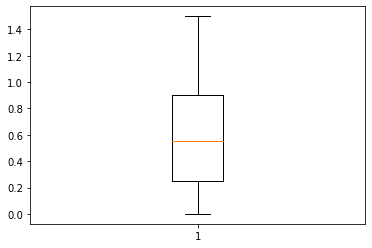

In [4]:
data['illness'].value_counts()
data['gender'].value_counts()
y = list(data.income)
plt.boxplot(y)
plt.show()

<Figure size 720x720 with 0 Axes>

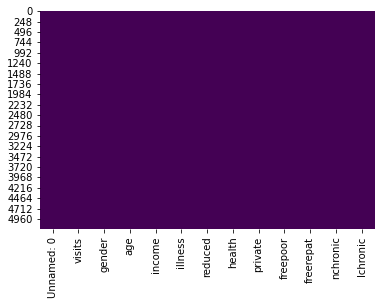

<Figure size 720x720 with 0 Axes>

In [13]:
data.groupby(['gender','reduced']).mean()
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

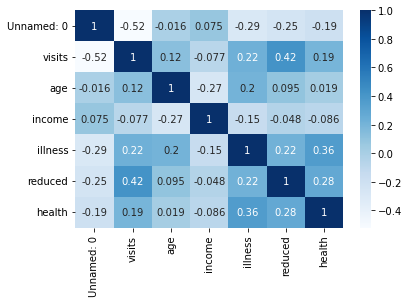

<Figure size 720x720 with 0 Axes>

In [15]:
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')
plt.figure(figsize=(10,10))

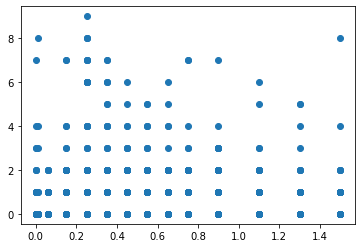

In [16]:

plt.scatter(x='income',y='visits',data=data)

<AxesSubplot:xlabel='INCOME', ylabel='VISITS'>

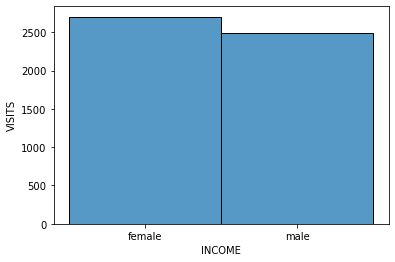

In [7]:
plt.xlabel('INCOME')
plt.ylabel('VISITS')
sns.histplot(data.gender,bins=2)

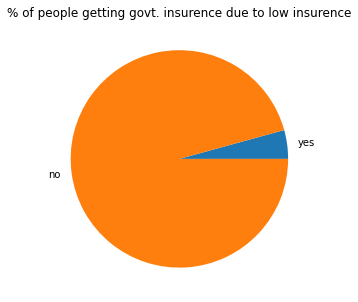

In [8]:
label=['yes','no']
Y = data[data['freepoor']=='yes']
N = data[data['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels = label)
plt.title("% of people getting govt. insurence due to low insurence")
plt.show()

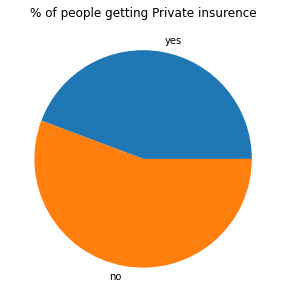

In [9]:
Y = data[data['private']=='yes']
N = data[data['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels = label)
plt.title("% of people getting Private insurence")
plt.show()

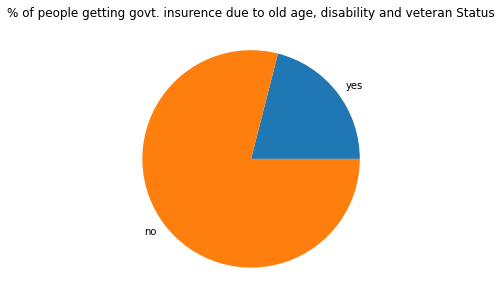

In [10]:
Y = data[data['freerepat']=='yes']
N = data[data['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels = label)
plt.title("% of people getting govt. insurence due to old age, disability and veteran Status")
plt.show()

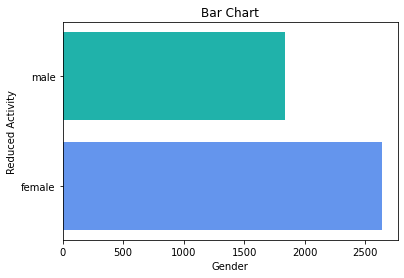

In [11]:
db= data.groupby("gender")['reduced'].sum().to_frame().reset_index()
plt.barh(db['gender'], db['reduced' ], color = ['cornflowerblue', 'lightseagreen'])
plt.title('Bar Chart')
plt.xlabel('Gender')
plt.ylabel('Reduced Activity')
plt.show()

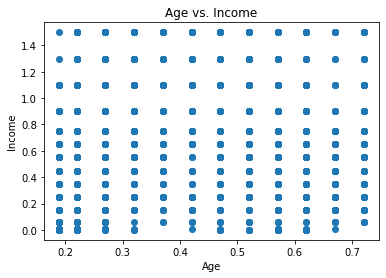

In [12]:
plt.scatter(data['age'], data['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.show()

In [21]:
# Average number of visits to the hospital by gender and illness
average_visits_by_gender_and_illness = data.groupby(['gender', 'illness'])['visits'].mean()
print(average_visits_by_gender_and_illness)


gender  illness
female  0          0.106038
        1          0.350120
        2          0.442561
        3          0.462462
        4          0.622754
        5          0.765823
male    0          0.057143
        1          0.238806
        2          0.354217
        3          0.354067
        4          0.504673
        5          0.910256
Name: visits, dtype: float64


In [22]:
# Correlation between income and reduced activity
correlation_between_income_and_reduced_activity = data['income'].corr(data['reduced'])
print(correlation_between_income_and_reduced_activity)

-0.04754529355784175
